Import file

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from statsmodels.stats.weightstats import ztest

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, permutation_test_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.inspection import permutation_importance

import shap

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv('sleep.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
dup=df.duplicated()
num_duplicates = dup.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [4]:
df.drop(columns='Person ID', inplace=True,axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
dup=df.duplicated()
num_duplicates = dup.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 242


In [6]:
level=LabelEncoder()
df['Gender']=level.fit_transform(df['Gender'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [8]:
df['Sleep Disorder'].fillna('Normal', inplace=True)
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,1,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,1,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal
8,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal
9,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal


In [9]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [10]:
df['BMI Category']=df['BMI Category'].replace('Normal Weight','Normal')
df.head(20)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,1,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,1,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal
8,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal
9,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Normal


In [11]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

Blood Pressure

In [12]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)
df.head(20)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125,80
3,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,1,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,1,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,1,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80
8,1,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80
9,1,29,Doctor,7.8,7,75,6,Normal,70,8000,Normal,120,80


One hot encoding

In [13]:
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category'], drop_first=True)
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,Normal,126,...,False,False,False,False,False,False,True,False,False,True
1,1,28,6.2,6,60,8,75,10000,Normal,125,...,False,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,75,10000,Normal,125,...,False,False,False,False,False,False,False,False,False,False
3,1,28,5.9,4,30,8,85,3000,Sleep Apnea,140,...,False,False,False,True,False,False,False,False,True,False
4,1,28,5.9,4,30,8,85,3000,Sleep Apnea,140,...,False,False,False,True,False,False,False,False,True,False


Calculate EDA(Exploratory Data Analysis)

In [14]:
df.isnull().sum()

Gender                             0
Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
Sleep Disorder                     0
Systolic BP                        0
Diastolic BP                       0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
BMI Category_Obese                 0
BMI Category_Overweight            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder                   374 non-null    object 
 9   Systolic BP                      374 non-null    int64  
 10  Diastolic BP                     374 non-null    int64  
 11  Occupation_Doctor                374 non-null    bool   
 12  Occupation_Engineer   

In [16]:
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


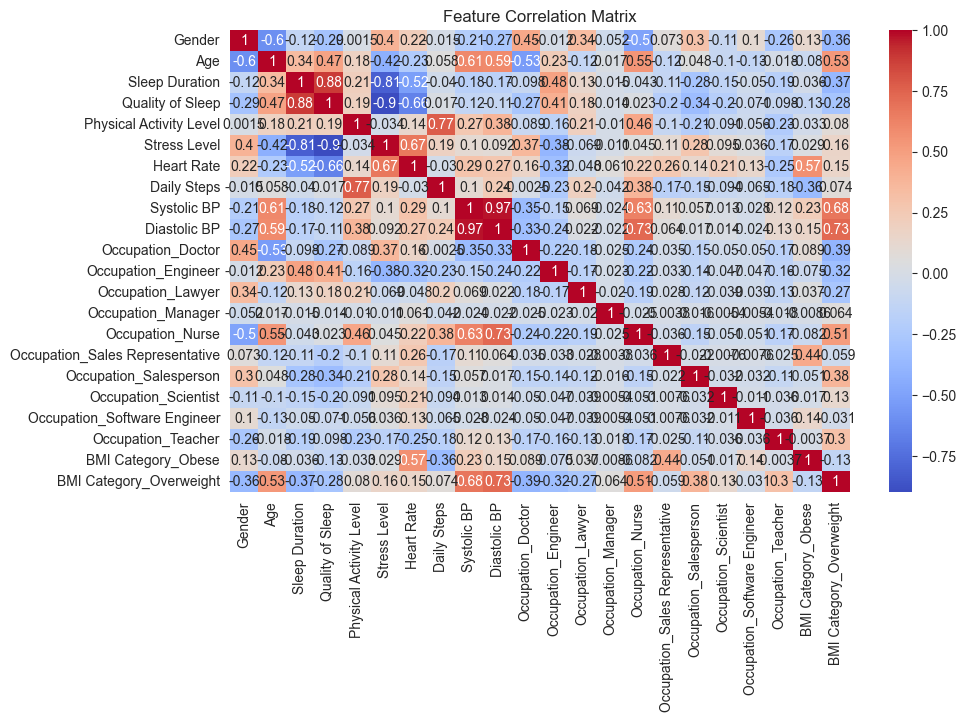

In [17]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [18]:
df.shape

(374, 23)

Level Encoding in y

In [19]:
encoder_y= LabelEncoder()
df['Sleep Disorder'] = encoder_y.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,1,126,...,False,False,False,False,False,False,True,False,False,True
1,1,28,6.2,6,60,8,75,10000,1,125,...,False,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,75,10000,1,125,...,False,False,False,False,False,False,False,False,False,False
3,1,28,5.9,4,30,8,85,3000,2,140,...,False,False,False,True,False,False,False,False,True,False
4,1,28,5.9,4,30,8,85,3000,2,140,...,False,False,False,True,False,False,False,False,True,False


In [20]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])


feature_cols = numeric_data.drop(columns=['Sleep Disorder'], errors='ignore')

correlation_with_target = {}

for col in feature_cols.columns:
    correlation_with_target[col] = df[col].corr(df['Sleep Disorder'])

correlation_series = pd.Series(correlation_with_target).sort_values(ascending=False)

print("Correlation of Features with Target (Sleep Disorder):")
print(correlation_series)


Correlation of Features with Target (Sleep Disorder):
Physical Activity Level    0.433214
Daily Steps                0.342098
Diastolic BP               0.310051
Systolic BP                0.241786
Age                        0.232000
Heart Rate                 0.205987
Quality of Sleep           0.179592
Sleep Duration             0.177552
Stress Level              -0.036058
Gender                    -0.253415
dtype: float64


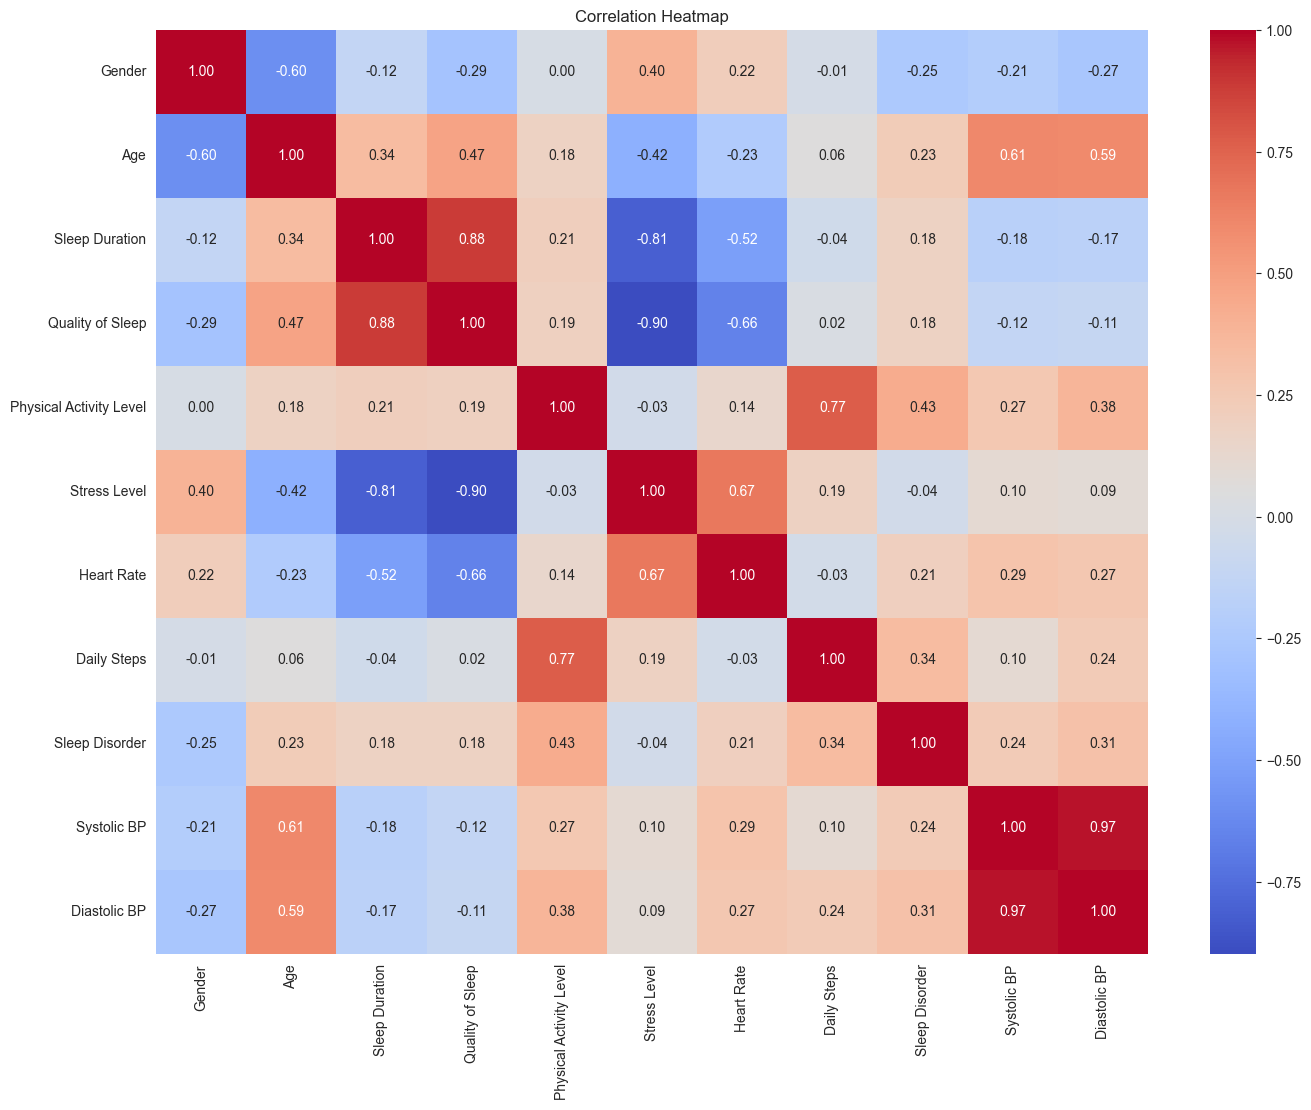

In [21]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Dependent & Independent Variable

In [22]:
X=df.drop(columns=['Sleep Disorder'],axis=1)
X.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,False,False,True,False,False,True
1,1,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
3,1,28,5.9,4,30,8,85,3000,140,90,...,False,False,False,True,False,False,False,False,True,False
4,1,28,5.9,4,30,8,85,3000,140,90,...,False,False,False,True,False,False,False,False,True,False


In [23]:
y=df[['Sleep Disorder']]
y.head(20)

,Sleep Disorder
0,1
1,1
2,1
3,2
4,2
5,0
6,0
7,1
8,1
9,1


Skew & kurtusis

In [24]:
numeric_features = X.select_dtypes(include=np.number)

skewness = numeric_features.skew()
kurtosis = numeric_features.kurt()

distribution_stats = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
distribution_stats

,Skewness,Kurtosis
Gender,-0.021478,-2.010318
Age,0.257222,-0.909780
Sleep Duration,0.037554,-1.286506
Quality of Sleep,-0.207448,-0.748276
Physical Activity Level,0.074487,-1.266068
Stress Level,0.154330,-1.327307
Heart Rate,1.224824,2.286455
Daily Steps,0.178277,-0.394031
Systolic BP,-0.035669,-0.893544
Diastolic BP,0.378570,-0.838693


Z-Score

In [25]:
z_scores = numeric_features.apply(zscore)


outliers = (np.abs(z_scores) > 3)

outlier_counts = outliers.sum()

outlier_report = pd.DataFrame({'Outlier Count': outlier_counts})
outlier_report[outlier_report['Outlier Count'] > 0]

,Outlier Count
Heart Rate,9


# Outlier Remove

In [26]:
from scipy.stats import zscore


numeric_features = df.select_dtypes(include=['int64', 'float64'])

z_scores = numeric_features.apply(zscore)

outliers = (np.abs(z_scores) > 3)

rows_without_outliers = ~(outliers.any(axis=1))

df_no_outliers = df[rows_without_outliers].reset_index(drop=True)

print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame without outliers shape: {df_no_outliers.shape}")


Original DataFrame shape: (374, 23)
New DataFrame without outliers shape: (365, 23)


PearSon Correlation

Z-Test

In [27]:
from statsmodels.stats.weightstats import ztest
import pandas as pd
from itertools import combinations

def perform_z_test(df_no_outliers, feature_col, group_col, group1, group2):
    group1_data = df_no_outliers[df_no_outliers[group_col] == group1][feature_col]
    group2_data = df_no_outliers[df_no_outliers[group_col] == group2][feature_col]

    if len(group1_data) < 2 or len(group2_data) < 2:
        return None, None
        
    z_stat, p_value = ztest(group1_data, group2_data, value=0)
    return z_stat, p_value


test_df = df_no_outliers.copy()  

features_to_test = ['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps','Physical Activity Level']

unique_groups = test_df['Sleep Disorder'].dropna().unique()

group_pairs = list(combinations(unique_groups, 2))

results = []


for feature in features_to_test:
    for g1, g2 in group_pairs:
        z_stat, p_val = perform_z_test(test_df, feature, 'Sleep Disorder', g1, g2)
        if z_stat is not None:
            results.append({
                'Feature': feature,
                'Group 1': g1,
                'Group 2': g2,
                'Z-Statistic': round(z_stat, 3),
                'P-Value': round(p_val, 20),
                'Significant': 'Yes' if p_val < 0.05 else 'No'
            })

ztest_results_df = pd.DataFrame(results)

ztest_results_df


,Feature,Group 1,Group 2,Z-Statistic,P-Value,Significant
0,Sleep Duration,1,0,8.773,1.740000e-18,Yes
1,Sleep Duration,1,2,3.081,2.063522e-03,Yes
2,Sleep Duration,0,2,-3.645,2.678304e-04,Yes
3,Stress Level,1,0,-3.577,3.470855e-04,Yes
4,Stress Level,1,2,-2.362,1.819210e-02,Yes
5,Stress Level,0,2,0.527,5.983236e-01,No
6,Heart Rate,1,0,-2.171,2.995204e-02,Yes
7,Heart Rate,1,2,-7.513,5.791903e-14,Yes
8,Heart Rate,0,2,-3.200,1.374388e-03,Yes
9,Daily Steps,1,0,4.915,8.872613e-07,Yes


In [28]:
X=df_no_outliers.drop(columns=['Sleep Disorder'],axis=1)
X.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,False,False,True,False,False,True
1,1,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
3,1,29,6.3,6,40,7,82,3500,140,90,...,False,False,False,False,False,False,False,True,True,False
4,1,29,7.8,7,75,6,70,8000,120,80,...,False,False,False,False,False,False,False,False,False,False


In [29]:
y=df_no_outliers[['Sleep Disorder']]
y.head(20)

,Sleep Disorder
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [30]:
X.shape

(365, 22)

Split Train Test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   
x_test.shape

(73, 22)

In [32]:
x_train.shape

(292, 22)

Random Forest

In [33]:
rf_model= RandomForestClassifier(random_state=1)
rf_model.fit(x_train, y_train.values.ravel())

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred_up = rf_model.predict(x_test)
y_pred_up

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1])

Confusion Matrix

In [35]:
accuracyy= accuracy_score(y_test, y_pred_up)
print(f'Accuracy: {accuracyy*100:.2f}%')
conf_matrix = confusion_matrix(y_test, y_pred_up)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred_up)
print('Classification Report:')
print(class_report)

Accuracy: 94.52%
Confusion Matrix:
[[13  0  2]
 [ 1 43  0]
 [ 0  1 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.98      0.98      0.98        44
           2       0.87      0.93      0.90        14

    accuracy                           0.95        73
   macro avg       0.92      0.92      0.92        73
weighted avg       0.95      0.95      0.95        73



In [36]:
rf_model.score(x_test, y_test)

0.9452054794520548

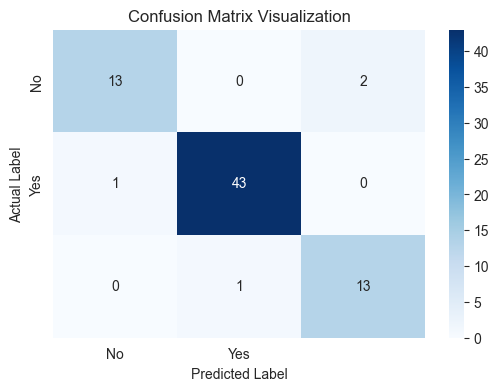

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Visualization")
plt.show()

In [38]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


Feature Importance Random forest 

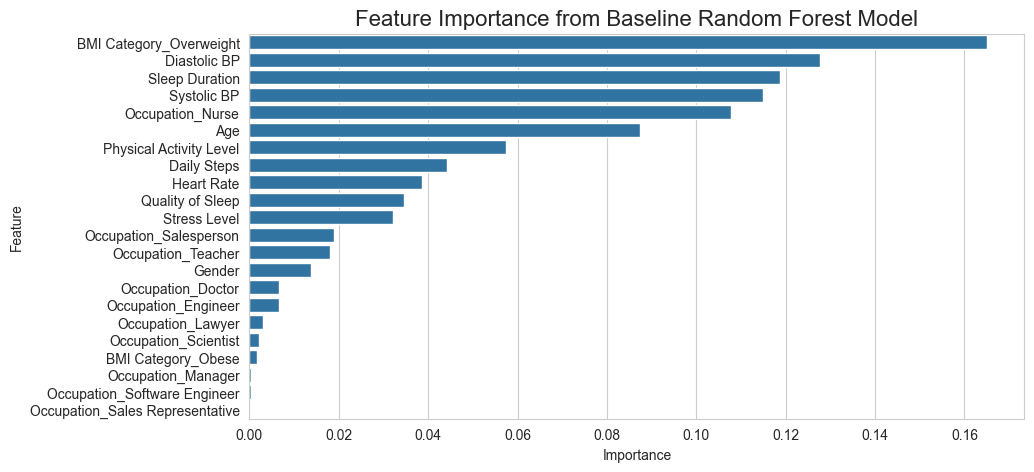

In [39]:
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(x_train, y_train)

importances = baseline_rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Baseline Random Forest Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


GRID Search Hyper Parameter Tuning

Decision Tree Classifier

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation F1 score: 0.8966

Evaluation report of Decision Tree Classifier (Test set):
              precision    recall  f1-score   support

      Normal       1.00      0.87      0.93        15
 Sleep Apnea       0.94      1.00      0.97        44
    Insomnia       0.85      0.79      0.81        14

    accuracy                           0.93        73
   macro avg       0.93      0.88      0.90        73
weighted avg       0.93      0.93      0.93        73



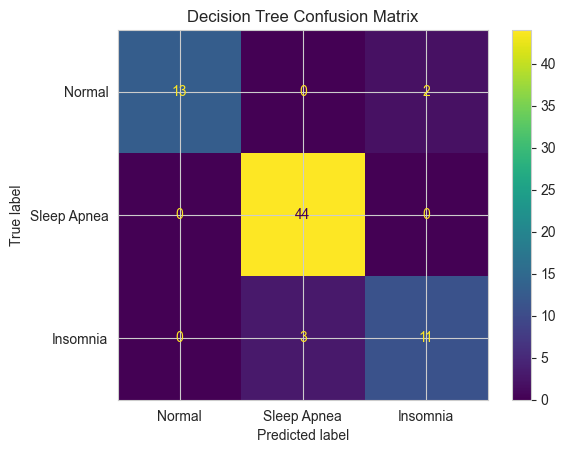

In [41]:
label_encoder = LabelEncoder()

label_encoder.classes_ = np.array(['Normal', 'Sleep Apnea', 'Insomnia'])
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [0, 5, 10, 20],
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(x_train, y_train)

print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best cross-validation F1 score: {grid_search_dt.best_score_:.4f}")

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

print("\nEvaluation report of Decision Tree Classifier (Test set):")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_.astype(str)))

try:
    display_labels = label_encoder.classes_.astype(str)
    ConfusionMatrixDisplay.from_estimator(best_dt, x_test, y_test, display_labels=display_labels)
    plt.title('Decision Tree Confusion Matrix')
    plt.show()
except Exception as e:
    print(f"Could not display the confusion matrix: {e}")


Random Forest Classifier

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation F1 score: 0.9025287507843787

Evaluation report of Random Forest Classifier (Test set):
              precision    recall  f1-score   support

     Class 0       1.00      0.87      0.93        15
     Class 1       0.98      1.00      0.99        44
     Class 2       0.87      0.93      0.90        14

    accuracy                           0.96        73
   macro avg       0.95      0.93      0.94        73
weighted avg       0.96      0.96      0.96        73



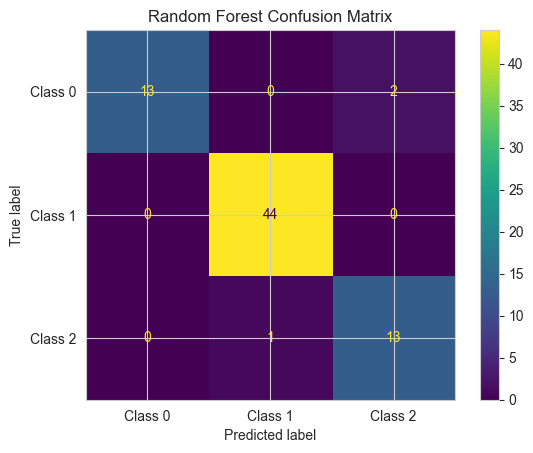

In [42]:
label_encoder = LabelEncoder()

class_names = [f'Class {i}' for i in np.unique(y)]

label_encoder.fit(class_names)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [0, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(x_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation F1 score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

print("\nEvaluation report of Random Forest Classifier (Test set):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

ConfusionMatrixDisplay.from_estimator(best_rf, x_test, y_test, display_labels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [43]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


Gradient Boosting Decision Trees

Fitting 5 folds for each of 54 candidates, totalling 270 fits


Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation F1 score: 0.8994

Evaluation report of Gradient Boosting Classifier (Test set):
              precision    recall  f1-score   support

     Class_0       1.00      0.87      0.93        15
     Class_1       0.98      1.00      0.99        44
     Class_2       0.87      0.93      0.90        14

    accuracy                           0.96        73
   macro avg       0.95      0.93      0.94        73
weighted avg       0.96      0.96      0.96        73



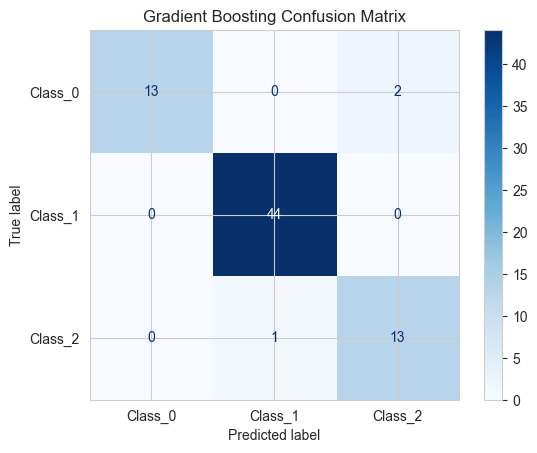

In [44]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = [f'Class_{i}' for i in range(len(np.unique(y))) ]
label_encoder.classes_ = np.array(class_names)
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(x_train, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print(f"Best cross-validation F1 score: {grid_search_gb.best_score_:.4f}")

best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(x_test)

a=best_gb

print("\nEvaluation report of Gradient Boosting Classifier (Test set):")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))

try:
    ConfusionMatrixDisplay.from_estimator(best_gb, x_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
    plt.title('Gradient Boosting Confusion Matrix')
    plt.show()
except Exception as e:
    print(f"\nCould not plot the confusion matrix: {e}")


In [45]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


Extra Trees Classifier

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters for Extra Trees: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation F1 score: 0.8993

Evaluation report of Extra Trees Classifier (Test set):
              precision    recall  f1-score   support

     Class_0       1.00      0.87      0.93        15
     Class_1       0.98      0.98      0.98        44
     Class_2       0.81      0.93      0.87        14

    accuracy                           0.95        73
   macro avg       0.93      0.92      0.92        73
weighted avg       0.95      0.95      0.95        73



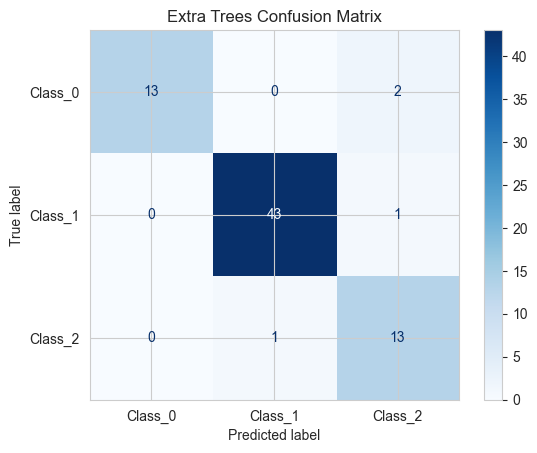

In [46]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class_names = [f'Class_{i}' for i in range(len(np.unique(y))) ]
label_encoder.classes_ = np.array(class_names)

param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [0, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_et = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_grid=param_grid_et,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_et.fit(x_train, y_train)

print("\nBest parameters for Extra Trees:", grid_search_et.best_params_)
print(f"Best cross-validation F1 score: {grid_search_et.best_score_:.4f}")

best_et = grid_search_et.best_estimator_
y_pred_et = best_et.predict(x_test)

print("\nEvaluation report of Extra Trees Classifier (Test set):")
print(classification_report(y_test, y_pred_et, target_names=label_encoder.classes_))

try:
    ConfusionMatrixDisplay.from_estimator(best_et, x_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
    plt.title('Extra Trees Confusion Matrix')
    plt.show()
except Exception as e:
    print(f"\nCould not plot the confusion matrix: {e}")


In [47]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


In [48]:
print(np.array(y_test))


[[0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [1]]


In [49]:

print("array(", np.array(y_test).ravel().tolist(), ")", sep="")
y_test_new=np.array(y_test).ravel().tolist()

array([0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1])


In [50]:
y_test_new

[0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1]

In [51]:
y_pred_dt

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 1, 1])

In [52]:
print("Total elements:", len(y_pred_dt))

Total elements: 73


In [53]:
y_pred_rf

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1])

In [54]:
y_pred_gb

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1])

In [55]:
y_pred_et

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1])

In [56]:
y_pred=y_pred_up
y_pred

array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1])

Performance

In [57]:
# y_test = np.array([0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1,
#        1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
#        1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
#        1, 0, 1, 1, 2, 1])
# y_pred_dt = np.array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
#        1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
#        1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
#        2, 1, 0, 1, 1, 1, 1])
# y_pred_rf = np.array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
#        1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
#        1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
#        2, 1, 0, 1, 1, 2, 1])
# y_pred_gb = np.array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
#        1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
#        1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
#        2, 1, 0, 1, 1, 2, 1])
# y_pred_et = np.array([0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1,
#        2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
#        1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
#        2, 1, 0, 1, 1, 2, 1])

best_dt, best_rf, best_gb, best_et = None, None, None, None

models = {
    'Decision Tree': (best_dt, y_pred_dt),
    'Random Forest': (best_rf, y_pred_rf),
    'Gradient Boosting': (best_gb, y_pred_gb),
    'Extra Trees': (best_et, y_pred_et)
}

performance_data = []

print(f" Size of X_test : {x_test.shape}")
# print(f"Size of y_test : {y_test_new.shape}")

for model_name, (model, y_pred) in models.items():
    accuracy = accuracy_score(y_test_new, y_pred)
    f1 = f1_score(y_test_new, y_pred, average='weighted')
    
    report = classification_report(y_test_new, y_pred, output_dict=True, zero_division=0)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    performance_data.append({
        'Model': model_name,
        'Accuracy': accuracy,  
        'Weighted Precision': precision,
        'Weighted Recall': recall,
        'Weighted F1-Score': f1
    })

performance_df = pd.DataFrame(performance_data)

print("Performane test of tuned model:")
display(performance_df)

 Size of X_test : (73, 22)
Performane test of tuned model:


,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1-Score
0,Decision Tree,0.931507,0.932023,0.931507,0.929937
1,Random Forest,0.958904,0.961035,0.958904,0.958711
2,Gradient Boosting,0.958904,0.961035,0.958904,0.958711
3,Extra Trees,0.945205,0.950342,0.945205,0.946053


K-Fold Cross Validation

Running 5-Fold Cross-Validation on preprocessed data...


Decision Tree: Mean Accuracy = 0.8959 (Std Dev = 0.0320)
Random Forest: Mean Accuracy = 0.9096 (Std Dev = 0.0282)
Gradient Boosting: Mean Accuracy = 0.9151 (Std Dev = 0.0236)
Extra Trees: Mean Accuracy = 0.8986 (Std Dev = 0.0412)


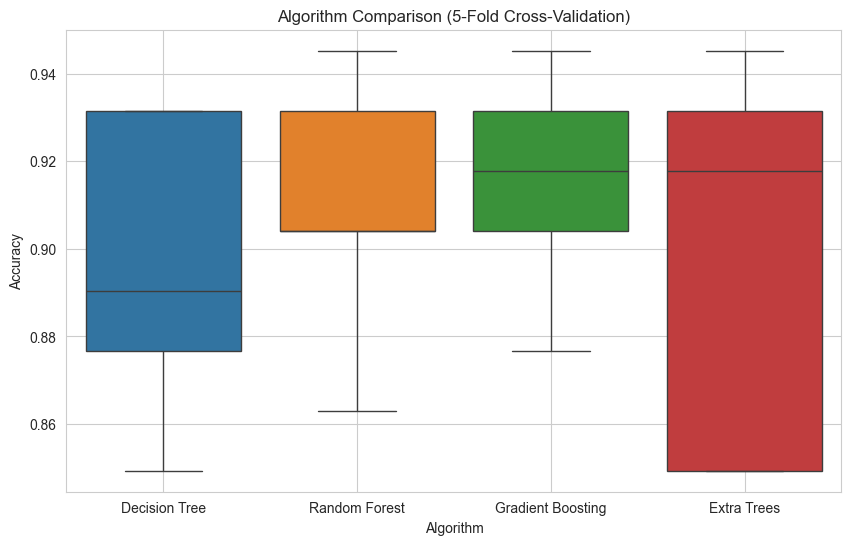

In [58]:
from sklearn.model_selection import  cross_val_score

y_encoded = LabelEncoder().fit_transform(y)


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("Running 5-Fold Cross-Validation on preprocessed data...")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y_encoded, cv=kfold, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f} (Std Dev = {cv_scores.std():.4f})")
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title('Algorithm Comparison (5-Fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.grid(True)
plt.show()


stratified cross-validation

In [59]:
from sklearn.model_selection import cross_val_score
#learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0
best_gb_model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.05,max_depth=3,subsample=1.0, random_state=42)
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"Model and Stratified {k_folds}-Fold object created.")
print("\nStarting Stratified Cross-Validation process...")

scores = cross_val_score(best_gb_model, X, y, cv=skf, scoring='accuracy')

print("\n--- Final Results of Cross-Validation ---")
print("==============================================")
print(f"Accuracy scores for each Fold: \n{np.round(scores, 4)}")
print("----------------------------------------------")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")
print("==============================================")
print("\nProcess completed.")

Model and Stratified 5-Fold object created.

Starting Stratified Cross-Validation process...

--- Final Results of Cross-Validation ---
Accuracy scores for each Fold: 
[0.9452 0.9315 0.8767 0.9041 0.9178]
----------------------------------------------
Mean Accuracy: 0.9151
Standard Deviation of Accuracy: 0.0236

Process completed.


Permutation Based Validation

In [60]:
print(f" Size of X_test : {x_test.shape}")
print(f"Size of y_test : {y_test.shape}")

 Size of X_test : (73, 22)
Size of y_test : (73, 1)


In [61]:
from sklearn.utils import resample
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

best_gb_model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.05,max_depth=3,subsample=1.0, random_state=42)
best_gb_model.fit(x_train, y_train)

print("\n--- Step 6: Validating Model Performance ---")

print("\n(b) Calculating Bootstrap Confidence Intervals...")
n_iterations = 1000
stats = []
for i in range(n_iterations):
    X_bs, y_bs = resample(x_test, y_test, random_state=i)
    
    y_pred_bs = best_gb_model.predict(X_bs)

    score = accuracy_score(y_bs, y_pred_bs)
    stats.append(score)

alpha = 0.95
p_lower = ((1.0 - alpha) / 2.0) * 100
p_upper = (alpha + (1.0 - alpha) / 2.0) * 100
lower_bound = max(0.0, np.percentile(stats, p_lower))
upper_bound = min(1.0, np.percentile(stats, p_upper))
print(f"95% Bootstrap Confidence Interval for Model Accuracy: [{lower_bound:.4f}, {upper_bound:.4f}]")

print("\n(c) Performing Permutation-based Validation...")
score, permutation_scores, pvalue = permutation_test_score(
    best_gb_model, x_test, y_test, scoring="accuracy", cv=StratifiedKFold(5), n_permutations=100, n_jobs=-1, random_state=42
)

print(f"Original Accuracy: {score:.4f}")
print(f"p-value from Permutation: {pvalue:.4f}")

if pvalue < 0.05:
    print("Result: Model performance is statistically significant and not due to random chance.")
else:
    print("Result: Caution, model performance might be due to random chance.")


Shape of X_test: (73, 22)
Shape of y_test: (73, 1)

--- Step 6: Validating Model Performance ---

(b) Calculating Bootstrap Confidence Intervals...
95% Bootstrap Confidence Interval for Model Accuracy: [0.9041, 1.0000]

(c) Performing Permutation-based Validation...
Original Accuracy: 0.9733
p-value from Permutation: 0.0099
Result: Model performance is statistically significant and not due to random chance.


Shap Calculation

In [62]:
print(f"size of X_test : {x_test.shape}")
print(f" size of y_test : {y_test.shape}")

size of X_test : (73, 22)
 size of y_test : (73, 1)


Using 292 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 73/73 [02:09<00:00,  1.77s/it]

SHAP Summary Plot:


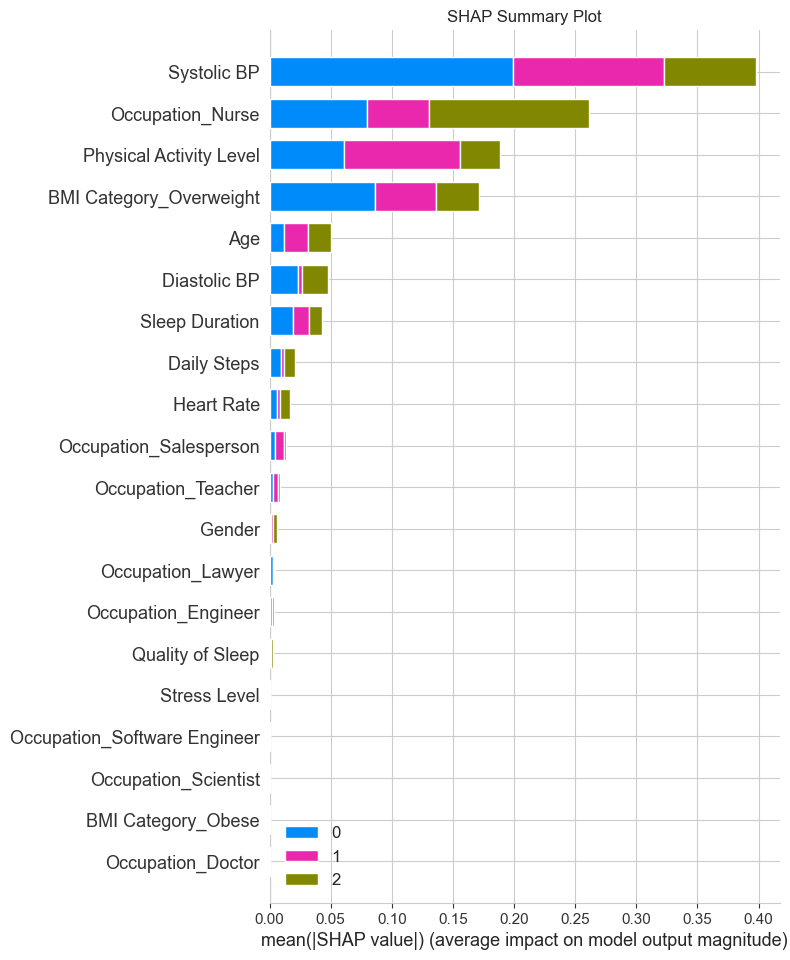

In [63]:
explainer = shap.KernelExplainer(best_gb_model.predict_proba, x_train)
shap_values = explainer.shap_values(x_test)

le = LabelEncoder()
le.fit(y)
class_names = le.inverse_transform(y.squeeze().unique())
print("SHAP Summary Plot:")

shap.summary_plot(
    shap_values,
    x_test,  
    plot_type="bar",
    class_names=class_names,
    show=False
)

plt.title("SHAP Summary Plot")
plt.show()